In [1]:
"""
Created on Mon Oct 19 10:41:21 2020

@author: stroeve
"""
import pandas as pd
import numpy as np
#import csv
#import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import axes_grid1
import calendar

#close all existing figures
plt.close("all")
#set stype
# plt.style.use('classic')

def ax_add_colorbar(im, aspect=20., pad_fraction=0.05, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

def hovmoller(x, y, z, cmap=None, norm=None, add_colorbar=False, ax=None, title=None, 
              units=None, cb_extend='neither', cb_units_fontsize=20, cb_label_fontsize=15,
              label_fontsize=15, title_fontsize=25, xlim=None, aspect=1.):
    """
    Plots a Hovmoller for an array
    
    Arguments
    ---------
    x - x-axis values for plot (year)
    y - y-axis values for plot (month)
    z - values for hovmoller
    """

    print (ax)
    
    ny, nx = z.shape
    
    if not ax:
        ax = plt.subplot(111)

    extent = [x.min()-0.5, x.max()+0.5, y.min()-0.5, y.max()+0.5]
    im = ax.imshow(z, cmap=cmap, norm=norm, extent=extent, origin='lower', aspect=aspect)

    if add_colorbar:
        #cbar = plt.colorbar(im, ax=ax, extend=cb_extend)
        cbar = ax_add_colorbar(im, pad_fraction=1.)
        #divider = axes_grid1.make_axes_locatable(ax)
        #cax = divider.append_axes("right", size="1%", pad=0.05)
        #cbar = plt.colorbar(im, cax=cax)
        cbar.ax.tick_params(labelsize=cb_label_fontsize)
        if units: cbar.ax.set_ylabel(units, fontsize=cb_units_fontsize)

    ylabels = [calendar.month_abbr[i].upper() for i in y]
    
    ax.set_yticks(np.arange(1,ny+1,1))
    ax.set_yticklabels(ylabels, fontsize=label_fontsize)

    ax.tick_params(labelsize=label_fontsize)

    if xlim:
        ax.set_xlim(xlim)
        
    if title: ax.set_title(title, fontsize=title_fontsize)

#from lib.plots import nc_plot_hovmoller, nc_plot_spectrum

def standardized_anomaly(x, start_year=1981, end_year=2010):
    '''Calculate standardized climate anomalies for each month'''
    return (x - x.loc[start_year: end_year].mean(axis=0, skipna=True)) / x.loc[start_year: end_year].std(axis=0, skipna=True)


   
#load data
# filepath='/Users/stroeve/Documents/seaice/'
# datafile=os.path.join(filepath,'Sea_Ice_Index_Monthly_Data_by_Year_G02135_v3.0.csv')
# using csv readers then I should have use keywords index_col, header and usecols to tell read_csv which columns and rows in the csv contain the index values and
# column headings. This avoids errors in assigning the wrong years to rows. so best to use:
# pd.read_csv(filepath,index_col=0,head=0,usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12])

# SIC_df=pd.DataFrame() #initialize dataframe
# SIC_df=pd.read_csv(datafile)
    
#cool way to read from a website
url = "ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/seaice_analysis/Sea_Ice_Index_Monthly_Data_by_Year_G02135_v3.0.xlsx"
df = pd.read_excel(url, index_col=0, usecols='A:M')
df.head()

climate_period_start = 1981
climate_period_end = 2010
#transform expects a function, but it is sending in the df object
df_stdanom = df.transform(standardized_anomaly, axis=0, start_year=climate_period_start, end_year=climate_period_end)
df_stdanom.head(10)

#an alternative to the above breaks down the steps
# xmean = df.loc[climate_period_start: climate_period_end, :].mean(axis=0, skipna=True)
# xstd = df.loc[climate_period_start: climate_period_end, :].std(axis=0, skipna=True)
# df_stdanom_alt = (df - xmean) / xstd
# df_stdanom_alt.head(10)

#compute the mean from 1981 to 2010 for each month
# clim=SIC_df.iloc[3:33,:].mean(skipna=True)  #this makes the climatology and skips the NaNs
# anom=SIC_df-clim
# anom['Year']=SIC_df['Year'] #fix the year in the anomaly data frame
# stdev=SIC_df.iloc[3:33,:].std(skipna=True)
# #compute standardized anomalies
# anom_sd=anom/stdev
# anom_sd['Year']=SIC_df['Year']


#generate time index
# time_index = pd.date_range('1978-09-01', '2020-10-01', freq='M')  # Generate example time index for sic
# year_index = pd.period_range('1978','2020',freq='Y') #Generates a series of years
# month_index= pd.interval_range(start=0,end=12)
# hovmoller(year_index,month_index,anom_sd)

# anom_sd['January'].plot()

# Prepare inputs
x = df_stdanom.index.values
y = np.linspace(1,12,12).astype(int)
z = df_stdanom.values.T

In [2]:
seasons = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

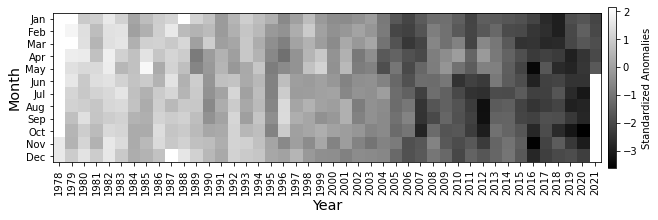

In [5]:
# Create plot
mpl.rcParams["axes.formatter.useoffset"] = False    #this fixes the x-axis plotting problem
fig, ax = plt.subplots(figsize=(10, 3))


im = plt.imshow(z,aspect=1,cmap='gray')
plt.colorbar(im,label='Standardized Anomalies',pad=0.01)
plt.yticks(np.arange(z.shape[0]),labels=seasons)
plt.xticks(np.arange(z.shape[1]),labels=x,rotation=90)
plt.ylabel('Month',fontsize='x-large')
plt.xlabel('Year',fontsize='x-large')

plt.tight_layout()

data_dir = '/home/robbie/Dropbox/Apps/Overleaf/Book_chapter/figs'
plt.savefig(f'{data_dir}/fig5_bw.jpg',dpi=500, bbox_inches='tight')

plt.show()

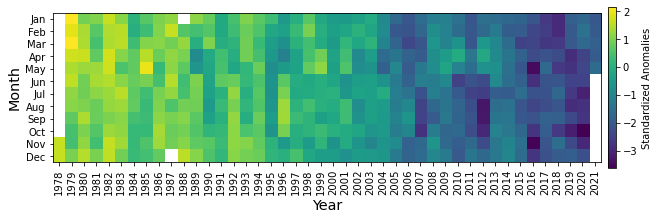

In [6]:
# Create plot
mpl.rcParams["axes.formatter.useoffset"] = False    #this fixes the x-axis plotting problem
fig, ax = plt.subplots(figsize=(10, 3))


im = plt.imshow(z,aspect=1,cmap=None)
plt.colorbar(im,label='Standardized Anomalies',pad=0.01)
plt.yticks(np.arange(z.shape[0]),labels=seasons)
plt.xticks(np.arange(z.shape[1]),labels=x,rotation=90)
plt.ylabel('Month',fontsize='x-large')
plt.xlabel('Year',fontsize='x-large')

plt.tight_layout()

data_dir = '/home/robbie/Dropbox/Apps/Overleaf/Book_chapter/figs'
plt.savefig(f'{data_dir}/fig5.jpg',dpi=500, bbox_inches='tight')

plt.show()